**IMORTING ALL REQUIRED LIB**

In [65]:
import yfinance as yf
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# NLTK VADER for sentiment analysis
import nltk
nltk.downloader.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# **1. Create a model to predict next 3 day stock prices using historical data.**

In [66]:
#Define the ticker symbols and corresponding company names
ticker_symbols = ['SPGI', 'GRAB', 'AAPL', 'AMZN']
companies = ['S&P Global Inc.', 'Grab Holdings Limited', 'Apple Inc.', 'Amazon.com, Inc.']
dfs = [] #Initialize an empty list to store the DataFrames
for symbol, company in zip(ticker_symbols, companies):                    #Iterate through each ticker symbol and fetch historical data
    try:
        stock_data = yf.download(symbol, start='2024-02-01', end='2024-03-15')     # Fetch historical data
        stock_data['Company'] = company         #Add a 'Company' column with the company name
        dfs.append(stock_data)                  #Append the stock data df to the list
    except Exception as e:
        print(f"Error fetching data for {company}: {e}")
all_stock_data = pd.concat(dfs)              #Concatenate all DataFrames in the list into a single DataFrame

# Save the data to a CSV file
file_path = "all_stock_data.csv"
all_stock_data.to_csv(file_path)

print("Data saved to", file_path)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Data saved to all_stock_data.csv


In [67]:
all_stock_data.head()

,Open,High,Low,Close,Adj Close,Volume,Company
Date,,,,,,,
2024-02-01,448.350006,457.459991,447.730011,457.220001,456.270660,1078100,S&P Global Inc.
2024-02-02,455.000000,456.730011,448.179993,454.049988,453.107239,1552900,S&P Global Inc.
2024-02-05,450.000000,453.019989,445.670013,451.540009,450.602478,1247300,S&P Global Inc.
2024-02-06,451.790009,454.519989,449.720001,453.290009,452.348816,975700,S&P Global Inc.
2024-02-07,459.380005,461.160004,453.630005,459.720001,458.765472,1584000,S&P Global Inc.


In [68]:
all_stock_data.tail()

,Open,High,Low,Close,Adj Close,Volume,Company
Date,,,,,,,
2024-03-08,176.440002,178.789993,174.330002,175.350006,175.350006,37853500,"Amazon.com, Inc."
2024-03-11,174.309998,174.470001,171.470001,171.960007,171.960007,28484800,"Amazon.com, Inc."
2024-03-12,173.500000,176.759995,171.979996,175.389999,175.389999,36610600,"Amazon.com, Inc."
2024-03-13,175.899994,177.619995,175.550003,176.559998,176.559998,30772600,"Amazon.com, Inc."
2024-03-14,177.690002,179.529999,176.470001,178.750000,178.750000,43705800,"Amazon.com, Inc."


In [69]:
all_stock_data.dropna(inplace=True)       #Cleand the data and handled missing values

In [70]:
stock_data.reset_index(inplace=True)

# Split data into features and target
X = all_stock_data.drop(columns=['Close','Company'], axis=1)  # Excluding 'Date' and 'Close' columns from features
y = all_stock_data['Close']


In [71]:
print(all_stock_data.columns)


Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Company'], dtype='object')


In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)         #split data in train and test

In [73]:
print(X_train.shape )
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(96, 5)
(24, 5)
(96,)
(24,)


In [74]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [75]:
NextThreeDayStock=stock_data.iloc[-1:].drop(columns=['Date', 'Close','Company'])

In [76]:
# Predict next 3-day stock prices
predictions_next_three_days = model.predict(NextThreeDayStock)
print("The model forecasts that the stock's price will be around", predictions_next_three_days ," per share over the upcoming three-day period.", )

The model forecasts that the stock's price will be around [178.84028658]  per share over the upcoming three-day period.


# **3. Compare two or more companies based on their industry.**

In [77]:
#Select relevant financial metrics for comparison
selected_features=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [78]:
comparison_metrics =all_stock_data[selected_features]

In [79]:
print("Comparison of Companies Based on Industry:")
print(comparison_metrics)

Comparison of Companies Based on Industry:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-02-01  448.350006  457.459991  447.730011  457.220001  456.270660   
2024-02-02  455.000000  456.730011  448.179993  454.049988  453.107239   
2024-02-05  450.000000  453.019989  445.670013  451.540009  450.602478   
2024-02-06  451.790009  454.519989  449.720001  453.290009  452.348816   
2024-02-07  459.380005  461.160004  453.630005  459.720001  458.765472   
...                ...         ...         ...         ...         ...   
2024-03-08  176.440002  178.789993  174.330002  175.350006  175.350006   
2024-03-11  174.309998  174.470001  171.470001  171.960007  171.960007   
2024-03-12  173.500000  176.759995  171.979996  175.389999  175.389999   
2024-03-13  175.899994  177.619995  175.550003  176.559998  176.559998   
2024-03-14  177.690002  179.529999  176.470001  178.750000  178.75000

# **2. Sentiment analysis on the news/twitter related to a particular stock.**

In [80]:
finwiz_url = 'https://finviz.com/quote.ashx?t='
news_tables = {}
tickers = ['AMZN']
for ticker in tickers:
    url = finwiz_url + ticker
    req = Request(url=url,headers={'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:20.0) Gecko/20100101 Firefox/20.0'})
    response = urlopen(req)
    # Read the contents of the file into 'html'
    html = BeautifulSoup(response)
    # Find 'news-table' in the Soup and load it into 'news_table'
    news_table = html.find(id='news-table')
    # Add the table to our dictionary
    news_tables[ticker] = news_table

In [81]:
# Read one single day of headlines for ‘AMZN’
amzn = news_tables['AMZN']
# Get all the table rows tagged in HTML with <tr> into ‘amzn_tr’
amzn_tr = amzn.findAll('tr')
for i, table_row in enumerate(amzn_tr):
    if table_row.a:
        a_text = table_row.a.text
    else:
        a_text = None
    td_text = table_row.td.text
    print(a_text)
    print(td_text)
    if i == 20:
        break


iRobot Stock: Buy, Sell, or Hold?

            Today 08:15AM
        
Beyond Market Price: Uncovering Amazon.com Inc's Intrinsic Value

            08:00AM
        
5 Things to Know Before the Stock Market Opens

            07:44AM
        
FedEx and Amazon Discussed Partnership as Competition for Returning Packages Intensifies

            07:00AM
        
AI-powered Technology Helps Fight Retail Crime

            05:55AM
        
A 15-year problem that has plagued corporate America is finally turning around

            05:06AM
        
Forget Nvidia: Billionaires Are Selling It and Buying This "Magnificent Seven" Stock Instead

            05:06AM
        
Fujitsu and AWS deepen global partnership to accelerate legacy applications modernization on the cloud

            04:01AM
        
11 Best Esports Stocks to Buy Now

            Mar-17-24 03:49PM
        
The Ultimate Growth Stock to Buy With $1,000 Right Now

            03:00PM
        
20 Countries with the Most Refugees in

In [82]:
parsed_news = []

# Read one single day of headlines for ‘AMZN’
amzn = news_tables['AMZN']

# Get all the table rows tagged in HTML with <tr> into ‘amzn_tr’
amzn_tr = amzn.findAll('tr')

# Initialize variables to store date and time
current_date = None

# Iterate through the table rows
for table_row in amzn_tr:
    # Check if 'a' tag exists within the 'tr' tag
    if table_row.a:
        # Extract the headline text
        headline_text = table_row.a.text

        # Extract the time text
        time_text = table_row.td.text.strip()

        # Check if the headline has a 'date' label
        if 'Today' in time_text or 'Mar-' in time_text:
            # If it has a 'date' label, update the current date
            current_date = time_text

        # Append the parsed data into the list
        parsed_news.append([current_date, time_text, headline_text])

# Print the parsed news list
for news_item in parsed_news:
    print(news_item)


['Today 08:15AM', 'Today 08:15AM', 'iRobot Stock: Buy, Sell, or Hold?']
['Today 08:15AM', '08:00AM', "Beyond Market Price: Uncovering Amazon.com Inc's Intrinsic Value"]
['Today 08:15AM', '07:44AM', '5 Things to Know Before the Stock Market Opens']
['Today 08:15AM', '07:00AM', 'FedEx and Amazon Discussed Partnership as Competition for Returning Packages Intensifies']
['Today 08:15AM', '05:55AM', 'AI-powered Technology Helps Fight Retail Crime']
['Today 08:15AM', '05:06AM', 'A 15-year problem that has plagued corporate America is finally turning around']
['Today 08:15AM', '05:06AM', 'Forget Nvidia: Billionaires Are Selling It and Buying This "Magnificent Seven" Stock Instead']
['Today 08:15AM', '04:01AM', 'Fujitsu and AWS deepen global partnership to accelerate legacy applications modernization on the cloud']
['Mar-17-24 03:49PM', 'Mar-17-24 03:49PM', '11 Best Esports Stocks to Buy Now']
['Mar-17-24 03:49PM', '03:00PM', 'The Ultimate Growth Stock to Buy With $1,000 Right Now']
['Mar-17-2

In [83]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download NLTK Vader lexicon (if not already downloaded)
nltk.download('vader_lexicon')

# Initialize the Vader sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Create an empty DataFrame to store the data
df = pd.DataFrame(columns=['Date', 'Time', 'Headline', 'Compound Score'])

# Iterate through the parsed news
for news_item in parsed_news:
    # Extract ticker, date, time, and headline from the parsed news item

    date = news_item[0]
    time = news_item[1]
    headline = news_item[2]

    # Perform sentiment analysis on the headline
    scores = sid.polarity_scores(headline)

    # Extract the compound score
    compound_score = scores['compound']

    # Append the data to the DataFrame
    df = df.append({'Date': date, 'Time': time, 'Headline': headline, 'Compound Score': compound_score}, ignore_index=True)

# Display the DataFrame
print(df)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
<ipython-input-83-325366fdf7ef>:29: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-83-325366fdf7ef>:29: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-83-325366fdf7ef>:29: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-83-325366fdf7ef>:29: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-83-325366fdf7ef>:29: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-83-

                 Date           Time  \
0       Today 08:15AM  Today 08:15AM   
1       Today 08:15AM        08:00AM   
2       Today 08:15AM        07:44AM   
3       Today 08:15AM        07:00AM   
4       Today 08:15AM        05:55AM   
..                ...            ...   
95  Mar-13-24 05:45PM        09:04AM   
96  Mar-13-24 05:45PM        09:00AM   
97  Mar-13-24 05:45PM        08:53AM   
98  Mar-13-24 05:45PM        07:58AM   
99  Mar-13-24 05:45PM        07:36AM   

                                             Headline  Compound Score  
0                   iRobot Stock: Buy, Sell, or Hold?          0.0000  
1   Beyond Market Price: Uncovering Amazon.com Inc...          0.3400  
2      5 Things to Know Before the Stock Market Opens          0.0000  
3   FedEx and Amazon Discussed Partnership as Comp...          0.1779  
4      AI-powered Technology Helps Fight Retail Crime         -0.5423  
..                                                ...             ...  
95  Laird Super

<ipython-input-83-325366fdf7ef>:29: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-83-325366fdf7ef>:29: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-83-325366fdf7ef>:29: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-83-325366fdf7ef>:29: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-83-325366fdf7ef>:29: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-83-325366fdf7ef>:29: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Us

In [84]:
# Categorize sentiment scores
def categorize_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the categorize_sentiment function to the 'Compound Score' column
df['Sentiment'] = df['Compound Score'].apply(categorize_sentiment)

# Display the modified DataFrame
print(df)


                 Date           Time  \
0       Today 08:15AM  Today 08:15AM   
1       Today 08:15AM        08:00AM   
2       Today 08:15AM        07:44AM   
3       Today 08:15AM        07:00AM   
4       Today 08:15AM        05:55AM   
..                ...            ...   
95  Mar-13-24 05:45PM        09:04AM   
96  Mar-13-24 05:45PM        09:00AM   
97  Mar-13-24 05:45PM        08:53AM   
98  Mar-13-24 05:45PM        07:58AM   
99  Mar-13-24 05:45PM        07:36AM   

                                             Headline  Compound Score  \
0                   iRobot Stock: Buy, Sell, or Hold?          0.0000   
1   Beyond Market Price: Uncovering Amazon.com Inc...          0.3400   
2      5 Things to Know Before the Stock Market Opens          0.0000   
3   FedEx and Amazon Discussed Partnership as Comp...          0.1779   
4      AI-powered Technology Helps Fight Retail Crime         -0.5423   
..                                                ...             ...   
95  Lair

In [85]:
# Create new columns for positive, negative, and neutral sentiment scores
df['Positive Score'] = df['Compound Score'].apply(lambda score: score if score > 0.05 else None)
df['Negative Score'] = df['Compound Score'].apply(lambda score: score if score < -0.05 else None)
df['Neutral Score'] = df['Compound Score'].apply(lambda score: score if -0.05 <= score <= 0.05 else None)

# Convert None values to NaN for consistency
df['Positive Score'] = df['Positive Score'].replace({None: float('nan')})
df['Negative Score'] = df['Negative Score'].replace({None: float('nan')})
df['Neutral Score'] = df['Neutral Score'].replace({None: float('nan')})

# Display the modified DataFrame
print(df)


                 Date           Time  \
0       Today 08:15AM  Today 08:15AM   
1       Today 08:15AM        08:00AM   
2       Today 08:15AM        07:44AM   
3       Today 08:15AM        07:00AM   
4       Today 08:15AM        05:55AM   
..                ...            ...   
95  Mar-13-24 05:45PM        09:04AM   
96  Mar-13-24 05:45PM        09:00AM   
97  Mar-13-24 05:45PM        08:53AM   
98  Mar-13-24 05:45PM        07:58AM   
99  Mar-13-24 05:45PM        07:36AM   

                                             Headline  Compound Score  \
0                   iRobot Stock: Buy, Sell, or Hold?          0.0000   
1   Beyond Market Price: Uncovering Amazon.com Inc...          0.3400   
2      5 Things to Know Before the Stock Market Opens          0.0000   
3   FedEx and Amazon Discussed Partnership as Comp...          0.1779   
4      AI-powered Technology Helps Fight Retail Crime         -0.5423   
..                                                ...             ...   
95  Lair

In [86]:

df.to_csv('sentiment_analysis_result.csv', index=False)


In [87]:
# Replace 'Today' in 'Date' and 'Time' columns with the current date
current_date = pd.to_datetime('today').strftime('%b-%d-%y')
df['Date'] = df['Date'].str.replace('Today', current_date)
df['Time'] = df['Time'].str.replace('Today', pd.to_datetime('today').strftime('%I:%M%p'))

# Convert time strings to 24-hour format
df['Time'] = pd.to_datetime(df['Time']).dt.strftime('%H:%M:%S')

# Concatenate 'Date' and 'Time' columns to create a datetime column
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

# Drop the original 'Date' and 'Time' columns
df = df.drop(columns=['Date', 'Time'])

# Display the cleaned DataFrame
print(df)

                                             Headline  Compound Score  \
0                   iRobot Stock: Buy, Sell, or Hold?          0.0000   
1   Beyond Market Price: Uncovering Amazon.com Inc...          0.3400   
2      5 Things to Know Before the Stock Market Opens          0.0000   
3   FedEx and Amazon Discussed Partnership as Comp...          0.1779   
4      AI-powered Technology Helps Fight Retail Crime         -0.5423   
..                                                ...             ...   
95  Laird Superfood, Inc. (AMEX:LSF) Q4 2023 Earni...          0.0000   
96  Target Takes on Amazon and Costco in Subscript...          0.1779   
97  SpringBig Holdings, Inc. (NASDAQ:SBIG) Q4 2023...          0.0000   
98  Bezos Seeks to Revamp Meat Alternatives in Cli...          0.0000   
99          Q4 2023 Laird Superfood Inc Earnings Call          0.0000   

   Sentiment  Positive Score  Negative Score  Neutral Score  \
0    Neutral             NaN             NaN            0.0 

In [88]:
df.isnull().sum()

Headline           0
Compound Score     0
Sentiment          0
Positive Score    44
Negative Score    87
Neutral Score     69
Datetime           0
dtype: int64

In [89]:
#Fill missing values
df['Positive Score'] = df['Positive Score'].fillna(0)
df['Negative Score'] = df['Negative Score'].fillna(0)
df['Neutral Score'] = df['Neutral Score'].fillna(0)
df.head()

,Headline,Compound Score,Sentiment,Positive Score,Negative Score,Neutral Score,Datetime
0,"iRobot Stock: Buy, Sell, or Hold?",0.0000,Neutral,0.0000,0.0000,0.0,2024-03-18 08:15:00
1,Beyond Market Price: Uncovering Amazon.com Inc...,0.3400,Positive,0.3400,0.0000,0.0,2024-03-18 08:00:00
2,5 Things to Know Before the Stock Market Opens,0.0000,Neutral,0.0000,0.0000,0.0,2024-03-18 07:44:00
3,FedEx and Amazon Discussed Partnership as Comp...,0.1779,Positive,0.1779,0.0000,0.0,2024-03-18 07:00:00
4,AI-powered Technology Helps Fight Retail Crime,-0.5423,Negative,0.0000,-0.5423,0.0,2024-03-18 05:55:00


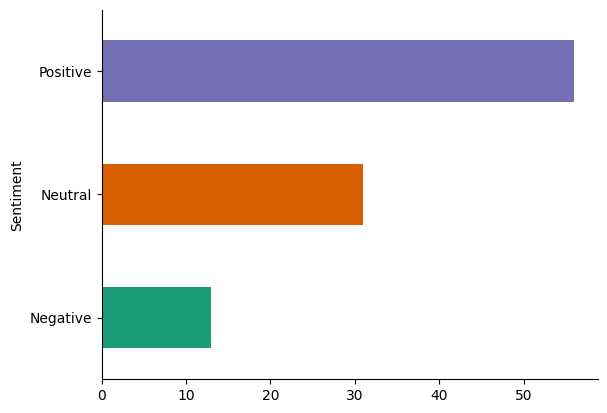

In [90]:
df.groupby('Sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# **Make a Dashboard to produce comprehensive reports and compile the findings.**

In [91]:
!pip install dash

In [92]:
import pandas as pd
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
import plotly.express as px

# Load the stock data
stock_data = pd.read_csv("all_stock_data.csv")

# Create a Dash app
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    html.H1("Stock Comparison Dashboard"),

    # Dropdown for selecting companies
    html.Label("Select Company:"),
    dcc.Dropdown(
        id='company-dropdown',
        options=[
            {'label': company, 'value': company} for company in stock_data['Company'].unique()
        ],
        value=stock_data['Company'].unique()[0],  # Default value
        multi=True  # Allow multiple selection
    ),

    # Line chart for stock prices
    dcc.Graph(id='stock-prices-graph'),

    # Table for displaying financial data
    html.H3("Financial Data"),
    html.Div(id='financial-data-table')
])

# Callback to update the line chart based on selected companies
@app.callback(
    Output('stock-prices-graph', 'figure'),
    [Input('company-dropdown', 'value')]
)
def update_stock_prices(selected_companies):
    filtered_data = stock_data[stock_data['Company'].isin(selected_companies)]
    fig = px.line(filtered_data, x='Date', y='Close', color='Company', title='Stock Prices Over Time')
    return fig

# Callback to update the financial data table based on selected companies
@app.callback(
    Output('financial-data-table', 'children'),
    [Input('company-dropdown', 'value')]
)
def update_financial_data(selected_companies):
    filtered_data = stock_data[stock_data['Company'].isin(selected_companies)]
    return generate_table(filtered_data)

# Function to generate an HTML table from a DataFrame
def generate_table(dataframe, max_rows=10):
    return html.Table([
        html.Thead(
            html.Tr([html.Th(col) for col in dataframe.columns])
        ),
        html.Tbody([
            html.Tr([
                html.Td(dataframe.iloc[i][col]) for col in dataframe.columns
            ]) for i in range(min(len(dataframe), max_rows))
        ])
    ])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>